In [1]:
import pandas as pd
import numpy as np
import os.path
from os import path
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option('display.max_rows', 500)

In [2]:
import sqlite3
conn = sqlite3.connect('sqlite-database.db')
contributions = pd.read_sql_query("SELECT * from github_contribution", conn, parse_dates=["date"])


In [3]:
prcreated = contributions[contributions.type == "PR_CREATED"]
first = prcreated.sort_values("date").groupby("author").first()[["date"]]
first = first.rename(columns={"date":"first"})
prcreated = pd.merge(prcreated.set_index("author"), first, left_index=True, right_index=True).reset_index()

In [4]:
prcreated["reltime"] = prcreated["date"] - prcreated["first"]
prcreated["month"] = prcreated.reltime.dt.days / 30 
prcreated = prcreated.sort_values("date")

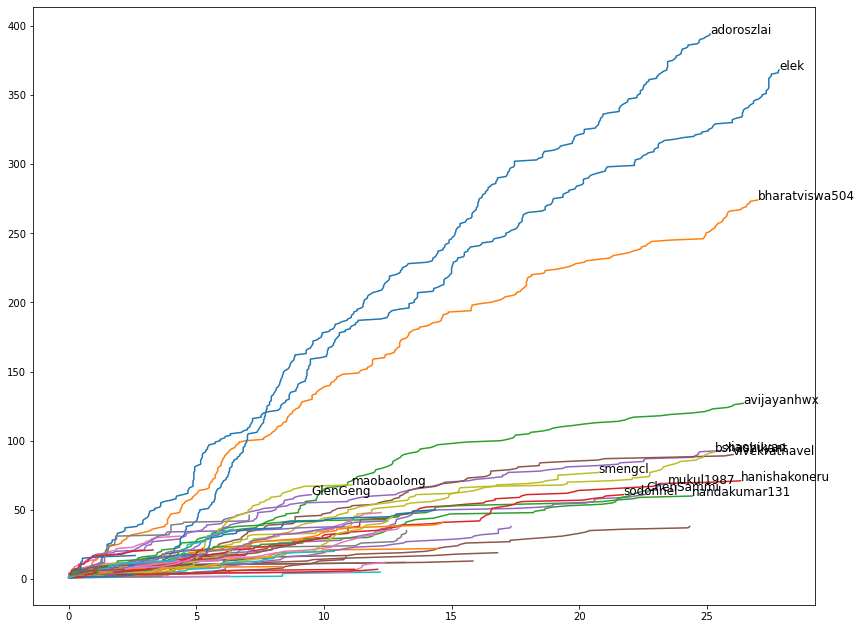

In [5]:
plt.figure(figsize=(14,11))
for author in prcreated.author.unique():
   points = prcreated[prcreated.author == author]["month"]
   plt.plot(points,range(1,len(points)+1))
   if len(points) > 50:
      plt.annotate(author, 
             xy=(max(points), len(points)), 
             size = 12)
# plt.plot(ad.loc["adoroszlai"]["prs"].index, ad.loc["adoroszlai"]["prs"].values)

plt.show()

In [6]:
top = prcreated[["identifier"]].groupby(prcreated.author).count().sort_values("identifier", ascending=False).head(10).index.values

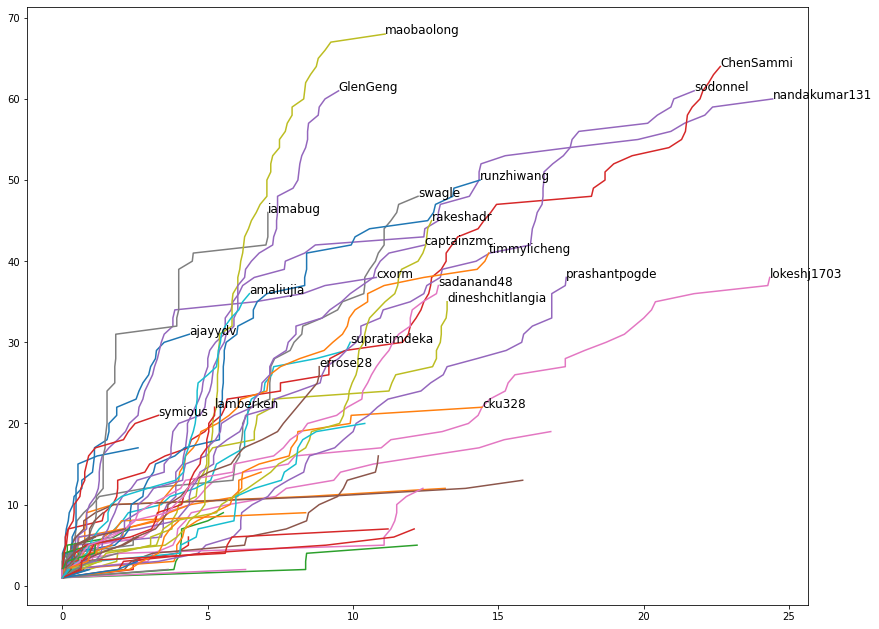

In [7]:
tail = prcreated[~prcreated.author.isin(top)]
plt.figure(figsize=(14,11))
for author in tail.author.unique():
   points = tail[tail.author == author]["month"]
   plt.plot(points,range(1,len(points)+1))
   if len(points) > 20:
      plt.annotate(author, 
             xy=(max(points), len(points)), 
             size = 12)

plt.show()